<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [137]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already **paid off or defaulted**. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [138]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-06-29 03:12:58--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-06-29 03:12:58 (11.4 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [139]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [140]:
df.shape

(346, 10)

### Convert to date time object 

In [141]:
# convert 'due_date' column to date time object
df['due_date'] = pd.to_datetime(df['due_date'])

# convert 'effective_date' column to date time object
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [142]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people **have paid off the loan on time** while 86 **have gone into collection** 


Lets plot some columns to understand data better :

In [143]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



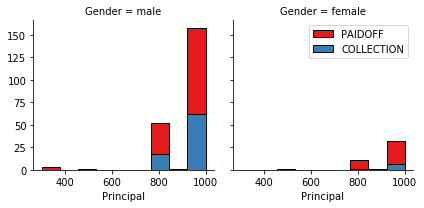

In [144]:
import seaborn as sns

# Returns number spaces with parameter start of interval range, end of interval range, and number of samples to generate
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)

# initializing a FacetGrid object with a dataframe and the names of the variables that will form the column and hue dimensions of the grid. 
# col and hue must be categorical, palette is colors to use for the different levels of the hue variable, col_wrap is “Wrap” the column variable at this width
g = sns.FacetGrid(df, col = "Gender", hue = "loan_status", palette = "Set1", col_wrap = 2)

# visualizing data on this grid is with the FacetGrid.map() method & look at the distribution of Principal in each of these subsets, using a histogram
# and name of variable in the dataframe (in this case is bins) to plot
g.map(plt.hist, 'Principal', bins = bins, ec="k")

g.axes[-1].legend()
plt.show()

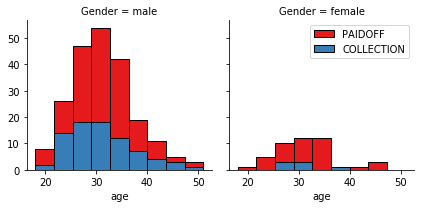

In [145]:
# Returns number spaces with parameter start of interval range, end of interval range, and number of samples to generate
bins = np.linspace(df.age.min(), df.age.max(), 10)

# initializing a FacetGrid object with a dataframe and the names of the variables that will form the column and hue dimensions of the grid. 
# col and hue must be categorical, palette is colors to use for the different levels of the hue variable, col_wrap is “Wrap” the column variable at this width
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)

# visualizing data on this grid is with the FacetGrid.map() method & look at the distribution of age in each of these subsets, using a histogram
# and name of variable in the dataframe (in this case is bins) to plot
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

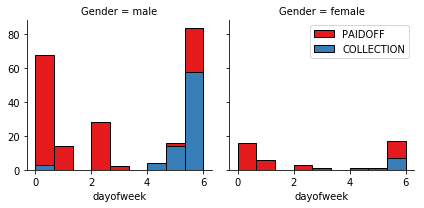

In [146]:
# make column dayofweek from column effective_date (ex. 2016-09-08 is thursday so the fourth day (3))
df['dayofweek'] = df['effective_date'].dt.dayofweek

bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)

g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)

g.map(plt.hist, 'dayofweek', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

We see that people **who get the loan at the end of the week (it's mean dayofweek=6) dont pay it off**, so lets use Feature binarization to set a threshold values less then day 4 

In [147]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [148]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize = True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

**86 % of female pay there loans** while **only 73 % of males pay there loan**


Lets convert male to 0 and female to 1 (Convert *categorical variable* into *dummy/indicator variables/numerical variables*):


In [149]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
df.head()

# The Other way
# from sklearn import preprocessing

# le_gender = preprocessing.LabelEncoder()
# le_gender.fit(['male','female'])
# X[:,9] = le_gender.transform(X[:,9]) 

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [150]:
df.groupby(['education'])['loan_status'].value_counts(normalize = True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [151]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables that in column education to binary variables and append them to the feature Data Frame 

In [152]:
Feature = df[['Principal','terms','age','Gender','weekend']]

# concat datdframe Feature with column education that contain binary variable
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis = 1)

# drop column 'Master or Above'
Feature.drop(['Master or Above'], axis = 1, inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [153]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables (y)?

In [154]:
# convert column 'loan_status' into array
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [155]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model. <br>
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either **scikit-learn, Scipy or Numpy libraries** for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# 1. K-Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your **loan_train.csv** into train and test to find the best __k__.

In [156]:
# Train Test Split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print ('Train set :',X_train.shape, y_train.shape)
print ('Test set :',X_test.shape, y_test.shape)

Train set : (276, 8) (276,)
Test set : (70, 8) (70,)


### Training

In [157]:
# Import library Classifier that implementing the k-nearest neighbors vote
from sklearn.neighbors import KNeighborsClassifier

#start the algorithm with k = 4
k = 4

#train the model
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

### Predicting

In [158]:
# we can use the model to predict the test set:
yhat1 = neigh.predict(X_test)
yhat1[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, **it calculates how closely the actual labels and predicted labels are matched in the test set.**

In [159]:
from sklearn import metrics

print('Train set Accuracy :', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set Accuracy :', metrics.accuracy_score(y_test, yhat1))

Train set Accuracy : 0.8152173913043478
Test set Accuracy : 0.6857142857142857


### Find the best k

**chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.**

We can calculate the accuracy of KNN for different K.

In [160]:
k = 10
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))
ConfustionMx = [];

# loop for n=1 until 9
for n in range(1, k):
    
    #Train Model, Predict, Calculate accuracy for each n  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat1 = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat1)

    
    std_acc[n-1]=np.std(yhat1 == y_test)/np.sqrt(yhat1.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

### Plot  model accuracy  for Different number of Neighbors (k)

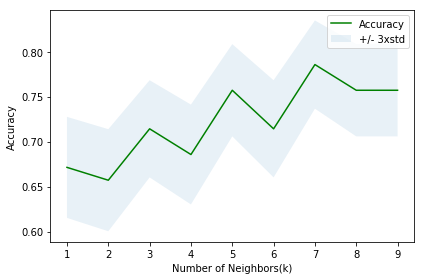

In [161]:
# range(1,k) for x-axis, mean_acc for y-axis, 'g' mean green line
plt.plot(range(1,k), mean_acc, 'g')

# the degree of blurring of the shaded area (the smaller alpha, the more transparent)
plt.fill_between(range(1,k), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)

plt.legend(('Accuracy', '+/- 3xstd'))
plt.xlabel('Number of Neighbors(k)')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [162]:
print("The best Accuracy is", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best Accuracy is 0.7857142857142857 with k = 7


# 2. Decision Tree

In [163]:
from sklearn.tree import DecisionTreeClassifier

Sklearn Decision Trees do not handle categorical variables in features in this dataset, convert categorical features to numerical values has been done in the **Pre-processing process.**

### Modeling

In [164]:
loan_statusTree = DecisionTreeClassifier(criterion='entropy', max_depth = 4)

# it shows the default parameters
loan_statusTree 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [165]:
# We will train the data 
loan_statusTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predicting

In [166]:
# we can use the model to predict the test set:
predTree = loan_statusTree.predict(X_test)

# We can compare the prediction to the actual values.
# This is the prediction values
predTree[0:5]

array(['COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [167]:
# This is the actual values
y_test[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. Essentially, **it calculates how closely the actual labels and predicted labels are matched in the test set.**

In [168]:
print('Decision Tree Accuracy :', metrics.accuracy_score(y_test, predTree))

Decision Tree Accuracy : 0.6142857142857143


# 3. Support Vector Machine

### Modeling

The SVM algorithm offers a choice of kernel functions for performing its processing. **Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function,** and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
    
Let's just use the default, RBF (Radial Basis Function) for this

In [169]:
from sklearn import svm

clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Predicting

In [170]:
yhat2 = clf.predict(X_test)
yhat2[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. Essentially, **it calculates how closely the actual labels and predicted labels are matched in the test set.**

In [171]:
print('SVM Accuracy :', metrics.accuracy_score(y_test, yhat2))

SVM Accuracy : 0.7428571428571429


# 4. Logistic Regression

### Modeling

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. **Smaller values specify stronger regularization.** 

The numerical optimizers to find parameters that we use in this modelling is **liblinear**

In [172]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Predicting

In [173]:
yhat3 = LR.predict(X_test)

print(y_test[0:5])
print(yhat3[0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


### Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. Essentially, **it calculates how closely the actual labels and predicted labels are matched in the test set.**

In [174]:
print('Logistic Regression Accuracy :', metrics.accuracy_score(y_test, yhat3))

Logistic Regression Accuracy : 0.6857142857142857


__predict_proba__  returns estimates (probability) for all classes, ordered by the label of classes. So, the first column is the probability of class collection, P(Y=1|X), and second column is probability of class paidoff, P(Y=0|X):

In [175]:
yhat3_prob = LR.predict_proba(X_test)
yhat3_prob[0:5]

array([[0.5034238 , 0.4965762 ],
       [0.45206111, 0.54793889],
       [0.30814132, 0.69185868],
       [0.34259428, 0.65740572],
       [0.32025894, 0.67974106]])

# 5. Model Evaluation using Test set

In [176]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [177]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-06-29 03:15:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-06-29 03:15:54 (403 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [178]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Convert to date time object 

In [179]:
# convert 'due_date' column to date time object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])

# convert 'effective_date' column to date time object
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


## Convert Categorical features to numerical values

Lets convert male to 0 and female to 1 (Convert *categorical variable* into *dummy/indicator variables/numerical variables*):

In [180]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
test_df.head()

# The Other way
# from sklearn import preprocessing

# le_gender = preprocessing.LabelEncoder()
# le_gender.fit(['male','female'])
# X[:,9] = le_gender.transform(X[:,9]) 

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0


### Lets look at the day of the week people get the loan 

In [181]:
# make column dayofweek from column effective_date (ex. 2016-09-08 is thursday so the fourth day (3))
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6


so lets use Feature binarization to set a threshold values less then day 4

In [182]:
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


#### Use one hot encoding technique to convert categorical varables that in column education to binary variables and append them to the Feature1 Data Frame 

In [183]:
Feature1 = test_df[['Principal','terms','age','Gender','weekend']]

# concat datdframe Feature with column education that contain binary variable
Feature1 = pd.concat([Feature1, pd.get_dummies(test_df['education'])], axis = 1)

# drop column 'Master or Above'
Feature1.drop(['Master or Above'], axis = 1, inplace=True)
Feature1.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


### Feature selection

In [184]:
# Lets defind feature sets, X:
X1 = Feature1
X1[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [185]:
# Our lables (y), convert column 'loan_status' into array
y1 = test_df['loan_status'].values
y1[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 
Data Standardization give data zero mean and unit variance (technically should be done after train test split)

In [186]:
X1= preprocessing.StandardScaler().fit(X1).transform(X1)
X1[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

## Accuracy of Model using Different Evaluation Metrics
### For KNN Algorithm

In [187]:
# we can use the model to predict the test set:
yhatknn = neigh.predict(X1)

# using jaccard_similarity_score
print('Jaccard score : %.4f' % jaccard_similarity_score(y1, yhatknn))

# using f1-score
print('Avg F1-score : %.4f' % f1_score(y1, yhatknn, average='weighted'))

Jaccard score : 0.7037
Avg F1-score : 0.6736


### For Decision Tree Algorithm

In [188]:
# we can use the model to predict the test set:
predTree1 = loan_statusTree.predict(X1)

# using jaccard_similarity_score
print('Jaccard score : %.4f' % jaccard_similarity_score(y1, predTree1))

# using f1-score
print('Avg F1-score : %.4f' % f1_score(y1, predTree1, average='weighted'))

Jaccard score : 0.7222
Avg F1-score : 0.7367


### For SVM Algorithm

In [189]:
# we can use the model to predict the test set:
yhatsvm = clf.predict(X1)

# using jaccard_similarity_score
print('Jaccard score : %.4f' % jaccard_similarity_score(y1, yhatsvm))

# using f1-score
print('Avg F1-score : %.4f' % f1_score(y1, yhatsvm, average='weighted'))

Jaccard score : 0.7963
Avg F1-score : 0.7584


### For LogisticRegression Algorithm

In [190]:
# we can use the model to predict the test set:
yhatlogreg = LR.predict(X1)

# using jaccard_similarity_score
print('Jaccard score : %.4f' % jaccard_similarity_score(y1, yhatlogreg))

# using f1-score
print('Avg F1-score : %.4f' % f1_score(y1, yhatlogreg, average='weighted'))

# __predict_proba__  returns estimates (probability) for all classes, ordered by the label of classes. 
# So, the first column is the probability of class collection, P(Y=1|X), and second column is probability of class paidoff, P(Y=0|X):
yhat4_prob = LR.predict_proba(X1)

# using logloss
# Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 
print ('LogLoss: : %.4f' % log_loss(y1, yhat4_prob))

Jaccard score : 0.7407
Avg F1-score : 0.6604
LogLoss: : 0.5672


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.7037  | 0.6736   | NA      |
| Decision Tree      | 0.7222  | 0.7367   | NA      |
| SVM                | 0.7963  | 0.7584   | NA      |
| LogisticRegression | 0.7407  | 0.6604   | 0.5672  |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>